In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math

In [14]:
df1=  pd.read_csv('AdvWorksCusts.csv')
df2=  pd.read_csv('AW_BikeBuyer.csv')
df = pd.concat([df1, df2['BikeBuyer']], axis =1)
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [15]:
print(df.shape)
print(sum(df.duplicated()))
df = df.drop_duplicates(keep = 'first')
print(df.shape)

(16519, 24)
98
(16421, 24)


In [16]:
df['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df['BirthDate'])
df['Age'] = df['Age'].astype('timedelta64[D]').astype(int)
df['Age'] = df['Age']/365
df['Age'].head(3)

0    31.756164
1    32.657534
2    32.410959
Name: Age, dtype: float64

In [27]:
df_new = df.drop(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
                  'PostalCode', 'PhoneNumber', 'BirthDate', 'City'], axis =1)
print(df_new.shape)

(16421, 13)


Check for missing values

In [28]:
df_new.isnull().values.any()

False

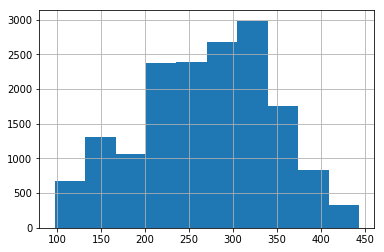

In [29]:
df_new['Age'] = df_new['Age'].apply(np.log)
df_new['YearlyIncome'] = df_new['YearlyIncome']**0.5
df_new['YearlyIncome'].hist()

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [221]:
le_city = LabelEncoder()
ohe_city = OneHotEncoder()
le_city.fit(df_new['City'])
city1 = le_city.transform(df_new['City'])
ohe_city.fit(city1.reshape(-1,1))
df_new['City']= ohe_city.transform(city1.reshape(-1,1)).toarray()

In [160]:
le_reg = LabelEncoder()
ohe_reg = OneHotEncoder()
le_reg.fit(df_new['CountryRegionName'])
country = le_reg.transform(df_new['CountryRegionName'])
ohe_reg.fit(country.reshape(-1,1))
df_new['CountryRegionName']= ohe_reg.transform(country.reshape(-1,1)).toarray()

In [194]:
le_educ = LabelEncoder()
ohe_educ = OneHotEncoder()
le_educ.fit(df_new['Education'])
education = le_educ.transform(df_new['Education'])
ohe_educ.fit(country.reshape(-1,1))
df_new['Education']= ohe_educ.transform(education.reshape(-1,1)).toarray()

In [195]:
le_occ = LabelEncoder()
ohe_occ = OneHotEncoder()
le_occ.fit(df_new['Occupation'])
occupation = le_occ.transform(df_new['Occupation'])
ohe_occ.fit(occupation.reshape(-1,1))
df_new['Occupation']= ohe_occ.transform(occupation.reshape(-1,1)).toarray()

In [196]:
le_gen = LabelEncoder()
ohe_gen = OneHotEncoder()
le_gen.fit(df_new['Gender'])
gender = le_gen.transform(df_new['Gender'])
ohe_gen.fit(gender.reshape(-1,1))
df_new['Gender']= ohe_gen.transform(gender.reshape(-1,1)).toarray()

In [197]:
le_mar = LabelEncoder()
ohe_mar = OneHotEncoder()
le_mar.fit(df_new['MaritalStatus'])
marital = le_mar.transform(df_new['MaritalStatus'])
ohe_mar.fit(marital.reshape(-1,1))
df_new['MaritalStatus']= ohe_mar.transform(marital.reshape(-1,1)).toarray()

In [198]:
le_home = LabelEncoder()
ohe_home = OneHotEncoder()
le_home.fit(df_new['HomeOwnerFlag'])
marital = le_home.transform(df_new['HomeOwnerFlag'])
ohe_home.fit(marital.reshape(-1,1))
df_new['HomeOwnerFlag']= ohe_home.transform(marital.reshape(-1,1)).toarray()

In [31]:
def encode_string(cat_feature):
    le = LabelEncoder()
    le.fit(cat_feature)
    le_features_cat = le.transform(cat_feature)
    ohe = OneHotEncoder()
    encoded = ohe.fit(le_features_cat.reshape(-1,1))
    return encoded.transform(le_features_cat.reshape(-1,1)).toarray()

In [34]:
categorical_columns = ['CountryRegionName', 'Education', 'Occupation','Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']

In [40]:
for col in categorical_columns:
    temp = encode_string(df_new[col])
    Features = np.concatenate([df_new, temp], axis = 1)

In [42]:
Features.shape

(16421, 19)

In [238]:
df_new['CountryRegionName'] = encode_string(df_new['CountryRegionName'])
df_new['Education'] = encode_string(df_new['Education'])
df_new['Occupation'] = encode_string(df_new['Occupation'])
df_new['Gender'] = encode_string(df_new['Gender'])
df_new['MaritalStatus'] = encode_string(df_new['MaritalStatus'])
df_new['HomeOwnerFlag'] = encode_string(df_new['HomeOwnerFlag'])
df_new['NumberCarsOwned'] = encode_string(df_new['NumberCarsOwned'])
df_new['NumberChildrenAtHome'] = encode_string(df_new['NumberChildrenAtHome'])
df_new['TotalChildren'] = encode_string(df_new['TotalChildren'])

In [239]:
df_new.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Rockhampton,Queensland,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,371.412170,0,3.458087
1,Seaford,Victoria,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,318.026728,1,3.486076
2,Hobart,Tasmania,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,303.224339,0,3.478497
3,North Ryde,New South Wales,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,294.428260,0,3.397813
4,Wollongong,New South Wales,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,304.583322,1,3.381647


In [242]:
df_new['NumberCarsOwned'].value_counts()

0.0    12637
1.0     3784
Name: NumberCarsOwned, dtype: int64

In [16]:
x = df_new.drop(['BikeBuyer', 'Age_cat'], axis =1)
y = df_new['BikeBuyer']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11494, 363)
(4927, 363)
(11494,)
(4927,)


In [18]:
sc= StandardScaler()
sc.fit(X_train[['Age', 'YearlyIncome']])
X_train[['Age', 'YearlyIncome']] = sc.transform(X_train[['Age', 'YearlyIncome']])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
X_test[['Age', 'YearlyIncome']] = sc.transform(X_test[['Age', 'YearlyIncome']])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
X_train.head()

,YearlyIncome,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,City_Bell Gardens,City_Bellevue,...,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
2967,0.019806,0.110985,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7751,-0.909636,-1.225661,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
777,-0.469383,0.068976,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13152,-1.461951,-1.809267,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12516,1.595807,-0.458708,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
pred_train = gnb.predict(X_train)
pred_test = gnb.predict(X_test)
#probabilities = svm.predict_proba(X_test)
#probabilities

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_curve, auc

In [25]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

          0       0.81      0.17      0.28      7674
          1       0.36      0.92      0.51      3820

avg / total       0.66      0.42      0.36     11494

             precision    recall  f1-score   support

          0       0.71      0.15      0.25      3290
          1       0.34      0.88      0.49      1637

avg / total       0.59      0.39      0.33      4927



In [26]:
print(confusion_matrix(y_train, pred_train))
print('\n')
print(confusion_matrix(y_test, pred_test))

[[1311 6363]
 [ 306 3514]]


[[ 490 2800]
 [ 200 1437]]


In [27]:
def print_metrics(labels, scores):
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 ScoreNotPurchased    Score Purchased')
    print('Not Purchased     %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Purchased Bike    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % accuracy_score(labels, scores))
    print(' ')
    print('             No            Yes')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred_test)  

                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased        490              2800
Purchased Bike       200              1437

Accuracy  0.39
 
             No            Yes
Num case     3290          1637
Precision    0.71          0.34
Recall       0.15          0.88
F1           0.25          0.49


In [31]:
x1 = x.drop(['YearlyIncome', 'Age'], axis =1)

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
inside = KFold(n_splits=10, shuffle = True)
outside = KFold(n_splits=10, shuffle = True)

In [33]:
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
nb_clf = BernoulliNB() 

## Perform the grid search over the parameters
clf = GridSearchCV(estimator = nb_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(x, y)
print(clf.best_estimator_.alpha)

10


In [34]:
from sklearn.model_selection import cross_val_score
cv_estimate = cross_val_score(clf, x, y, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.793
SDT of the metric       = 0.009
Outcomes by cv fold
Fold  1    0.790
Fold  2    0.789
Fold  3    0.805
Fold  4    0.781
Fold  5    0.784
Fold  6    0.802
Fold  7    0.804
Fold  8    0.785
Fold  9    0.787
Fold 10    0.803


In [35]:
nb_mod = BernoulliNB(alpha = clf.best_estimator_.alpha) 
nb_mod.fit(X_train, y_train)

BernoulliNB(alpha=10, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, roc_auc_score

In [40]:
NB_mod = BernoulliNB(alpha = clf.best_estimator_.alpha,
                            class_prior = [0.33,0.67]) 
NB_mod.fit(X_train, y_train)
#probabilities = NB_credit_mod.predict_proba(X_test)
#print_metrics(y_test, probabilities, 0.5) 

BernoulliNB(alpha=10, binarize=0.0, class_prior=[0.33, 0.67], fit_prior=True)

In [41]:
pred = NB_mod.predict(X_test) 

In [42]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2361  929]
 [ 422 1215]]
             precision    recall  f1-score   support

          0       0.85      0.72      0.78      3290
          1       0.57      0.74      0.64      1637

avg / total       0.75      0.73      0.73      4927



In [43]:
print(roc_auc_score(y_test, pred))

0.7299202707896608


In [44]:
print(precision_recall_fscore_support(y_test, pred))

(array([0.84836507, 0.56669776]), array([0.71762918, 0.74221136]), array([0.77753993, 0.64268712]), array([3290, 1637], dtype=int64))


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
le = LabelEncoder()
le1 = le.fit(df_new['City', 'StateProvinceName', 'CountryRegionName', 'Education', 'Occupation','Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']])

KeyError: "['City' 'StateProvinceName' 'CountryRegionName' 'Education' 'Occupation'\n 'Gender' 'MaritalStatus' 'HomeOwnerFlag' 'NumberCarsOwned'\n 'NumberChildrenAtHome' 'TotalChildren'] not in index"